# Project 1 - Retail - PGP

**DESCRIPTION**

**Problem Statement**

 * It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.

 * Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits

 * Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).


**Dataset Description**

This is a transnational data set which contains all the transactions that occurred between **01/12/2010** and **09/12/2011** for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.



| Variables | Description |
| :--- | :--- |
| InvoiceNo | Invoice number. <br/> _Nominal, a six digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation_ |
| StockCode | Product (item) code.  <br/> _Nominal, a five digit integral number uniquely assigned to each distinct product_ |
| Description | Product (item) name. <br/> _Nominal_ |
| Quantity | The quantities of each product (item) per transaction. <br/> _Numeric_ |
| InvoiceDate | Invoice Date and time. <br/> _Numeric, the day and time when each transaction was generated_ |
| UnitPrice | Unit price. <br/> _Numeric, product price per unit in sterling_ |
| CustomerID | Customer number. <br/> _Nominal, a six digit integral number uniquely assigned to each customer_ |
| Country | Country name. <br/> _Nominal, the name of the country where each customer resides_ |



<br/>

Download the **datasets** from _**[here](https://github.com/Simplilearn-Edu/Data-Science-Capstone-Projects "GitHub Repository")**_.

---

## Project Task: Week 1

**Data Cleaning:**

1. Perform a preliminary data inspection and data cleaning.

    a. Check for missing data and formulate an apt strategy to treat them.

    b. Remove duplicate data records.

    c. Perform descriptive analytics on the given data.


**Data Transformation:**

2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

    a. Create month cohorts and analyze active customers for each cohort.

    b. Analyze the retention rate of customers.


### Code :

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Reading the dataset
input_ds = pd.read_excel('Online Retail.xlsx')

In [4]:
input_ds.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
input_ds.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
#remove rows where customerID are NA
input_ds.dropna(subset=['CustomerID'],how='all',inplace=True)
input_ds.shape

(406829, 8)

In [11]:
input_ds.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
# drop duplicates
input_ds_copy = input_ds
input_ds_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)

In [29]:
input_ds_copy.count

<bound method DataFrame.count of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
7         536366     22633               HAND WARMER UNION JACK         6   
9         536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
21        536368     22960             JAM MAKING SET WITH JARS         6   
25        536369     21756             BATH BUILDING BLOCK WORD         3   
...          ...       ...                                  ...       ...   
541865    581583     20725              LUNCH BAG RED RETROSPOT        40   
541867    581584     20832     RED FLOCK LOVE HEART PHOTO FRAME        72   
541869    581585     22481       BLACK TEA TOWEL CLASSIC DESIGN        12   
541890    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
541894    581587     22631             CIRCUS PARADE LUNCH BOX         12   

               InvoiceDate  UnitPrice  Cus

In [7]:
idx = input_ds_copy.groupby([input_ds_copy.StockCode, input_ds_copy.Description, input_ds_copy.CustomerID, input_ds_copy.Quantity.abs(), 
                             input_ds_copy.Country, input_ds_copy.UnitPrice]).filter(lambda x:(x.Quantity.sum() == 0)).index

print (idx)

Int64Index([   728,   2421,  11761,  11799,  13013,  13019,  13037,  13042,
             19997,  20127,
            ...
            519823, 519830, 519831, 529776, 529980, 530204, 534291, 534573,
            540421, 540422],
           dtype='int64', length=394)


In [9]:
print(input_ds_copy.drop(idx))
input_ds_copy.dtypes

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
7         536366     22633               HAND WARMER UNION JACK         6   
9         536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
21        536368     22960             JAM MAKING SET WITH JARS         6   
25        536369     21756             BATH BUILDING BLOCK WORD         3   
...          ...       ...                                  ...       ...   
541865    581583     20725              LUNCH BAG RED RETROSPOT        40   
541867    581584     20832     RED FLOCK LOVE HEART PHOTO FRAME        72   
541869    581585     22481       BLACK TEA TOWEL CLASSIC DESIGN        12   
541890    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
541894    581587     22631             CIRCUS PARADE LUNCH BOX         12   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [12]:
input_ds_copy = input_ds_copy[~input_ds_copy.InvoiceNo.str.contains("C", na=False)]

In [14]:
input_ds_copy.shape

(18536, 8)

In [37]:
input_ds_copy.shape

(21796, 8)

In [15]:
input_ds_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18536 entries, 0 to 541894
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    18536 non-null  object        
 1   StockCode    18536 non-null  object        
 2   Description  18536 non-null  object        
 3   Quantity     18536 non-null  int64         
 4   InvoiceDate  18536 non-null  datetime64[ns]
 5   UnitPrice    18536 non-null  float64       
 6   CustomerID   18536 non-null  float64       
 7   Country      18536 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.3+ MB


In [16]:
input_ds_copy.describe()

,Quantity,UnitPrice,CustomerID
count,18536.000000,18536.000000,18536.000000
mean,38.486998,6.758569,15266.224158
std,819.580377,93.613846,1734.178524
min,1.000000,0.000000,12346.000000
25%,3.000000,1.250000,13773.500000
50%,10.000000,2.080000,15176.500000
75%,24.000000,4.650000,16779.000000
max,80995.000000,8142.750000,18287.000000


In [17]:
input_ds_copy['AmountSpend'] = input_ds_copy['UnitPrice'] * input_ds_copy['Quantity']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
#Amount spend ny top 15 countries
x = input_ds_copy.groupby('Country')['AmountSpend'].mean().sort_values().head(15)

<AxesSubplot:ylabel='Country'>

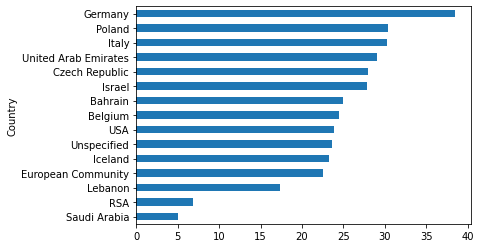

In [19]:
x.plot(kind='barh')

Country
Netherlands        12315
Germany             7971
France              7305
EIRE                6240
Japan               5873
Australia           3688
Sweden              3084
Spain               1743
Belgium             1463
Finland             1354
Switzerland         1075
Channel Islands      635
Portugal             616
Canada               565
Cyprus               515
Name: Quantity, dtype: int64


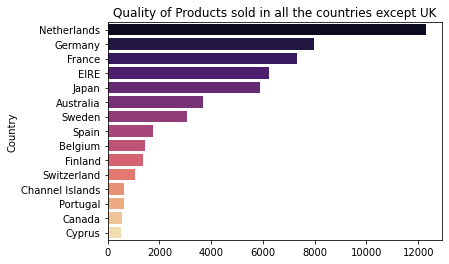

In [29]:
a = input_ds_copy['Quantity'].groupby(input_ds_copy['Country']).agg('sum').sort_values(ascending = False)[1:].head(15)
print(a)

sns.barplot(x = a.values, y = a.index, palette = 'magma')
plt.title('Quantity of Products sold in all the countries')
plt.show()

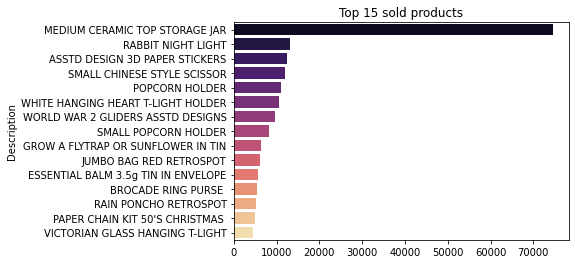

In [32]:
b = input_ds_copy['Quantity'].groupby(input_ds_copy['Description']).agg('sum').sort_values(ascending = False)[1:].head(15)
sns.barplot(x = b.values, y = b.index, palette = 'magma')
plt.title('Top 15 sold products')
plt.show()

In [33]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [40]:
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS 

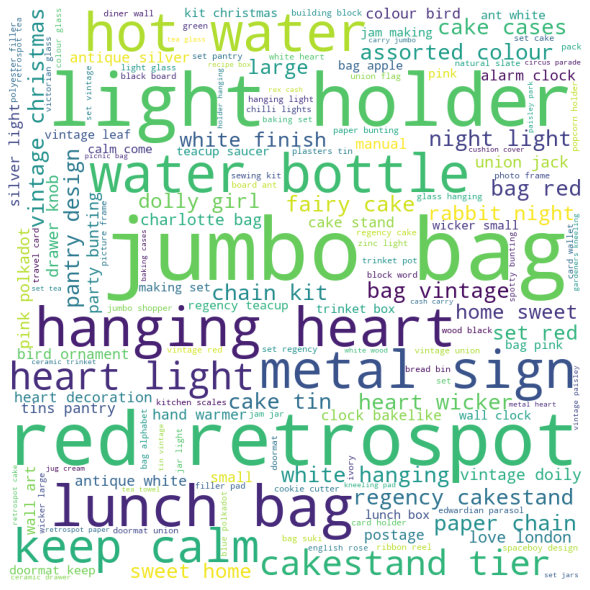

In [80]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in input_ds_copy.Description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

---

## Project Task: Week 2

**Data Modeling :**

1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

2. Calculate RFM metrics.

3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

    b1. Combine three ratings to get a RFM segment (as strings).

    b2. Get the RFM score by adding up the three ratings.

    b3. Analyze the RFM segments by summarizing them and comment on the findings.

**Note:** Rate `“recency"` for customer _who has been active more recently higher than the less recent customer_, because each company wants its customers to be recent.

**Note:** Rate `“frequency"` and `“monetary"` _higher_, because the company wants the customer to visit more often and spend more money

### Code :

In [81]:
import datetime as dt
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
input_ds_copy['InvoiceMonth'] = input_ds_copy['InvoiceDate'].apply(get_month)
input_ds_copy['CohortMonth'] = input_ds_copy.groupby('CustomerID')['InvoiceMonth'].transform('min')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


One is invoice month, the other is cohort month.
With the helper function “get_month”, I am able to create the invoice month column first.

The next is cohort month which is the the first month among all the transactions done by a customer.

In [82]:
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
invoice_year, invoice_month, _ = get_date(input_ds_copy, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date(input_ds_copy, 'CohortMonth')
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month
input_ds_copy['CohortIndex'] = year_diff * 12 + month_diff + 1

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


#### Observation - 1

> I created a cohort index for each row. 
> The cohort index is the month difference between invoice month and cohort month for each row.
> By doing the deduction, I am able to know the month lapse between that specific transaction and the first transaction that user made.

In [83]:
input_ds_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpend,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010-12-01,2010-12-01,1
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-12-01,2010-12-01,1
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,25.50,2010-12-01,2010-12-01,1
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,17.85,2010-12-01,2010-12-01,1


#### Observation - 3

> Create 1st Cohort: User number & Retention Rate
The first cohort I use here is the number of active users. I use groupby and pivot table functions.

In [84]:
cohort_data = input_ds_copy.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_count = cohort_data.pivot_table(index = 'CohortMonth',
                                       columns = 'CohortIndex',
                                       values = 'CustomerID')
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the result above, the first column in the chart is active user number on that specific month, and the following columns show how the many remaining users are still using the service on the second, third, and fourth month. The 13th column and 2010–12–1 row means 248 users out of 929 users were still buying things after the 13 months from 2010/12/1. Based on this data frame, I can further transform the absolute number into percentage to showcase the retention rate using the code below.

In [85]:
cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size, axis = 0)
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The first column is no doubt 100% retention rate, and with time going by, the retention rate would drop. Finally, I am able to visualize the retention data frame with Seaborn heatmap to make the result more understandable.

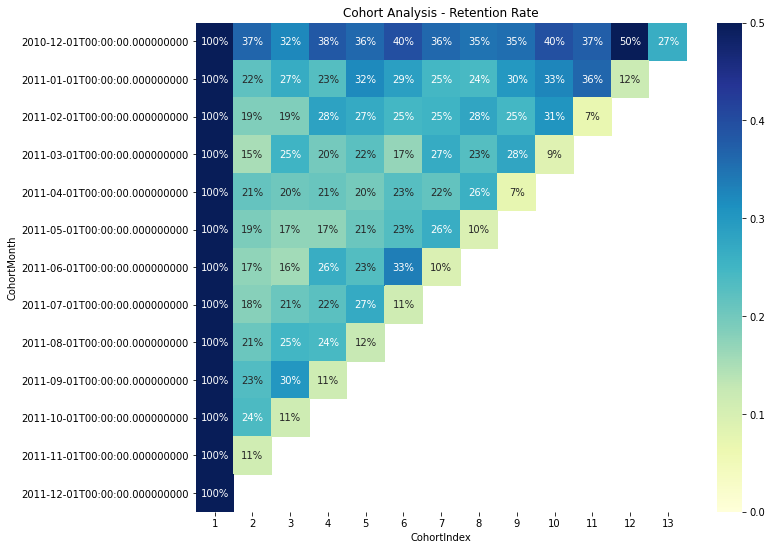

In [86]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "YlGnBu")
plt.show()

#### Observation

From the graph, it can be concluded that on 2011/11 some strategies might be implemented to increase the return users. About 50% of user from 2010/12 cohort return on 2011/11. Marketing analysts or product analysts might further investigate if some campaigns or feature changes that lead to the higher retention.

Create the 2nd Cohort: Average Quantity Sold Beside retention metrics, there are many metrics the power of cohort can be utilized. In the 2nd cohort, I show the average quantity on the time series basis, seeing how the purchase quantity changes along with months.

In [87]:
cohort_data2 = input_ds_copy.groupby(['CohortMonth', 'CohortIndex'])['Quantity'].mean().reset_index()
average_quantity  = cohort_data2.pivot_table(index = 'CohortMonth',
                                            columns = 'CohortIndex',
                                       values = 'Quantity').round(1)
average_quantity

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,28.9,32.9,37.1,31.9,27.3,32.3,31.3,35.8,37.1,40.3,45.2,32.6,36.2
2011-01-01,182.1,28.8,21.6,37.9,24.0,22.8,27.7,19.1,21.9,20.4,25.2,15.8,NaN
2011-02-01,43.5,37.7,74.3,34.8,30.9,40.6,31.7,26.1,34.8,28.4,57.7,NaN,NaN
2011-03-01,17.8,27.8,38.8,24.3,24.2,40.1,32.4,34.6,44.7,41.6,NaN,NaN,NaN
2011-04-01,16.4,15.8,15.7,16.5,18.3,11.5,22.8,21.4,11.9,NaN,NaN,NaN,NaN
2011-05-01,33.1,25.7,29.7,25.6,13.1,11.3,19.2,2713.9,NaN,NaN,NaN,NaN,NaN
2011-06-01,20.5,38.1,16.4,28.4,40.8,40.7,10.6,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,22.4,28.6,9.2,13.5,18.7,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,14.9,23.9,15.3,16.0,9.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


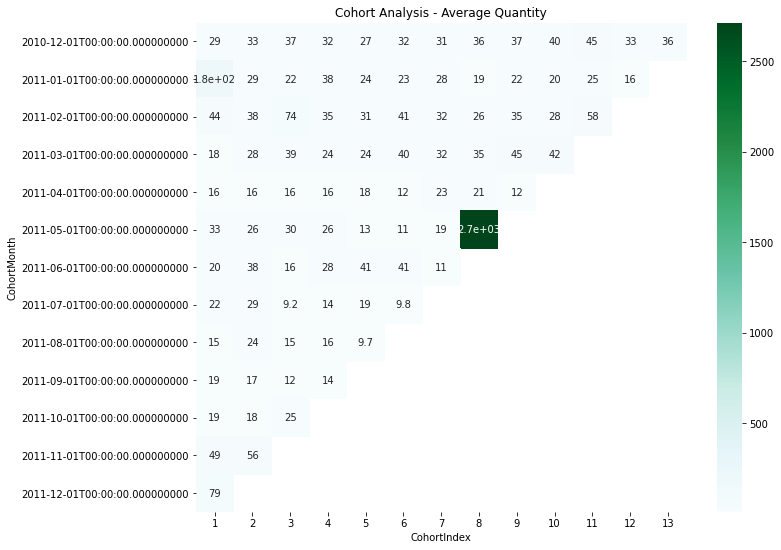

In [88]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Average Quantity')
sns.heatmap(data = average_quantity, 
            annot = True, 
            cmap = "BuGn")
plt.show()

#### Observation
It is observed that within the recent cohort/month, the average quantity was facing a decline. It is a warning signal that users stopped buying merchandise.

Create the 3rd Cohort: Average Sales Before creating this cohort, I munged the total sales column by multiplying quantity and unit price. And the following step is quite similar to the 2nd cohort.

In [89]:
input_ds_copy['TotalSale'] = input_ds_copy['Quantity'] * input_ds_copy['UnitPrice']
cohort_data3 = input_ds_copy.groupby(['CohortMonth', 'CohortIndex'])['TotalSale'].mean().reset_index()
average_sales  = cohort_data3.pivot_table(index = 'CohortMonth',
                                           columns = 'CohortIndex',
                                      values = 'TotalSale').round(1)
average_sales

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,54.0,57.0,61.4,66.5,56.0,80.0,69.8,61.6,61.2,79.4,96.2,59.3,59.4
2011-01-01,216.6,41.2,41.6,100.4,45.7,40.3,38.9,43.5,43.5,63.6,55.7,50.1,NaN
2011-02-01,47.2,54.4,93.6,42.6,29.3,31.7,41.4,44.6,59.1,49.1,74.4,NaN,NaN
2011-03-01,33.7,67.8,53.2,43.4,41.2,34.5,47.1,61.6,54.1,56.3,NaN,NaN,NaN
2011-04-01,31.7,38.2,43.1,31.3,33.9,24.1,33.8,36.0,18.5,NaN,NaN,NaN,NaN
2011-05-01,55.3,51.0,58.8,47.4,28.8,28.1,32.6,5650.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,182.1,57.4,29.0,29.8,50.7,65.8,26.9,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,34.0,40.9,24.1,23.7,29.1,26.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,28.7,35.9,27.2,28.6,19.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


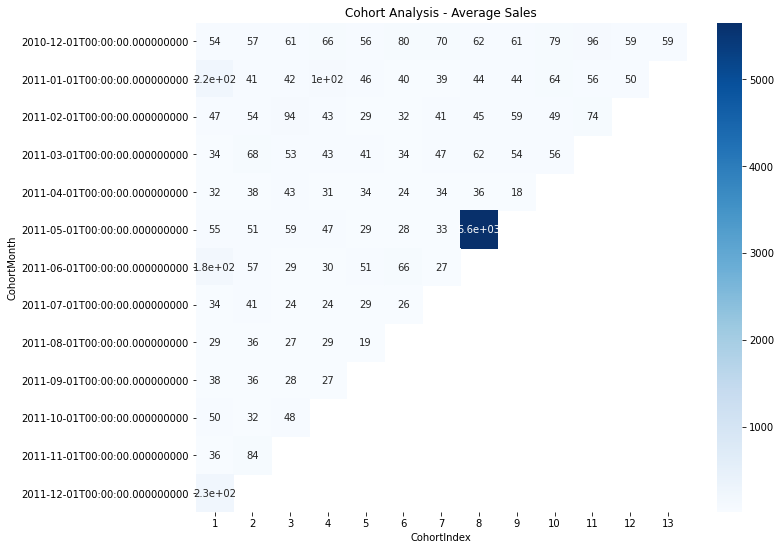

In [90]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Average Sales')
sns.heatmap(data = average_sales, 
            annot = True, 
            cmap = "Blues")
plt.show()

#### Observation

The situation for average sales is parallel with the average quantity, which the retailer faces a significant decline in recent months.

In [91]:
#create a new column called date which contains the date of invoice only
input_ds_copy['date'] = pd.DatetimeIndex(input_ds_copy['InvoiceDate']).date

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
#group by customers and check last date of purshace
recency_df = input_ds_copy.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head()

,CustomerID,LastPurshaceDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [93]:
#last date available in our dataset
input_ds_copy['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [94]:
import datetime as dt

In [95]:
now = dt.date(2011,12,9)
print(now)

2011-12-09


#### Recency

Recent customer transaction

In [96]:
#calculate recency
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)

In [97]:
recency_df.head()

,CustomerID,LastPurshaceDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


In [98]:
#drop LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)

#### Frequency

Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

In [99]:
#calculate frequency of purchases
frequency_df = input_ds_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


#### Monetary 

Monetary attribute answers the question: How much money did the customer spent over time?

To do that, first, we will create a new column total cost to have the total price per invoice.

In [101]:
#create column total cost
input_ds['TotalCost'] = input_ds['Quantity'] * input_ds['UnitPrice']

In [102]:
monetary_df = input_ds.groupby(by='CustomerID',as_index=False).agg({'TotalCost': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,163.16
2,12348.0,331.36
3,12349.0,15.00
4,12350.0,25.20


In [103]:
#merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='CustomerID')
temp_df.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12347.0,2,7
2,12348.0,75,4
3,12349.0,18,1
4,12350.0,310,1


In [104]:
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
#use CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)
#check the head
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,0.00
12347.0,2,7,163.16
12348.0,75,4,331.36
12349.0,18,1,15.00
12350.0,310,1,25.20


In [105]:
#Validate data for one of the customers
input_ds_copy[input_ds_copy['CustomerID'] == 12349.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpend,InvoiceMonth,CohortMonth,CohortIndex,TotalSale,date
485502,577609,23112,PARISIENNE CURIO CABINET,2,2011-11-21 09:51:00,7.5,12349.0,Italy,15.0,2011-11-01,2011-11-01,1,15.0,2011-11-21


In [106]:
(now - dt.date(2011,9,26)).days == 74

True

Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

In [107]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,1.0,15.150
0.50,50.0,2.0,39.800
0.75,141.5,5.0,111.205


In [108]:
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 15.15, 0.5: 39.8, 0.75: 111.20500000000001}}

Combine three ratings to get a RFM segment (as strings).

In [109]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [110]:
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [111]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346.0,325,1,0.00,1,1,1
12347.0,2,7,163.16,4,4,4
12348.0,75,4,331.36,2,3,4
12349.0,18,1,15.00,3,1,1
12350.0,310,1,25.20,1,1,2


Now that we have the score of each customer, we can represent our customer segmentation. First, we need to combine the scores (R_Quartile, F_Quartile,M_Quartile) together.

In [112]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12346.0,325,1,0.00,1,1,1,111
12347.0,2,7,163.16,4,4,4,444
12348.0,75,4,331.36,2,3,4,234
12349.0,18,1,15.00,3,1,1,311
12350.0,310,1,25.20,1,1,2,112


Best Recency score = 4: most recently purchase. Best Frequency score = 4: most quantity purchase. Best Monetary score = 4: spent the most.

Let's see who are our Champions (best customers).

In [113]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
18102.0,0,60,38834.79,4,4,4,444
17949.0,1,45,25593.67,4,4,4,444
17450.0,8,46,20062.47,4,4,4,444
14646.0,1,74,18688.06,4,4,4,444
16013.0,3,47,15437.88,4,4,4,444
16333.0,7,22,14418.96,4,4,4,444
15769.0,7,26,10185.24,4,4,4,444
12901.0,8,28,8240.21,4,4,4,444
13798.0,1,57,7831.76,4,4,4,444


How many customers do we have in each segment?

In [114]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  387
Loyal Customers:  872
Big Spenders:  1085
Almost Lost:  68
Lost Customers:  11
Lost Cheap Customers:  355


---

## Project Task: Week 3

**Data Modeling :**

1. Create clusters using k-means clustering algorithm.

    a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

    b. Decide the optimum number of clusters to be formed.

    c. Analyze these clusters and comment on the results.


### Code :

In [115]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

In [116]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(rfm_segmentation)

In [117]:
# Kmeans with K=5 arbitary
from sklearn.cluster import KMeans
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(RFM_norm1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [126]:
model_clus5.fit_predict(RFM_norm1)

array([2, 1, 0, ..., 3, 1, 1], dtype=int32)

In [127]:
model_clus5.score(RFM_norm1)

-10017.820627877689

In [129]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(RFM_norm1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(RFM_norm1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.38276539932738285
For n_clusters=3, the silhouette score is 0.35094476690223364
For n_clusters=4, the silhouette score is 0.3633925426671957
For n_clusters=5, the silhouette score is 0.3736479220987101
For n_clusters=6, the silhouette score is 0.3572474963246676
For n_clusters=7, the silhouette score is 0.35408930197241223
For n_clusters=8, the silhouette score is 0.3553330365657687


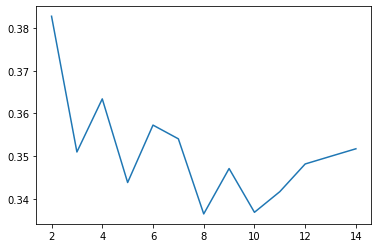

In [130]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

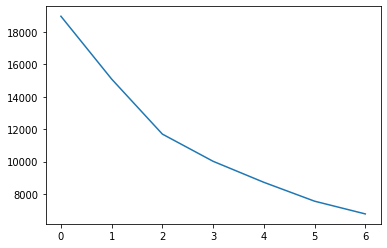

In [125]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(RFM_norm1)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [167]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(RFM_norm1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [168]:
kmeans.labels_

array([2, 0, 0, ..., 1, 0, 0], dtype=int32)

In [169]:
# assign the label
rfm_segmentation['Cluster_Id'] = kmeans.labels_
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Cluster_Id,Cluster_Labels
CustomerID,,,,,,,,,
12346.0,325,1,0.00,1,1,1,111,2,0
12347.0,2,7,163.16,4,4,4,444,0,0
12348.0,75,4,331.36,2,3,4,234,0,0
12349.0,18,1,15.00,3,1,1,311,1,0
12350.0,310,1,25.20,1,1,2,112,2,0


<AxesSubplot:xlabel='Cluster_Id', ylabel='Monetary'>

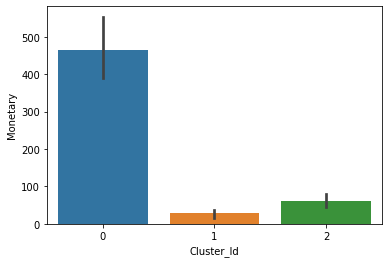

In [172]:
# Box plot to visualize Cluster Id vs Frequency

sns.barplot(x='Cluster_Id', y='Monetary', data=rfm_segmentation)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

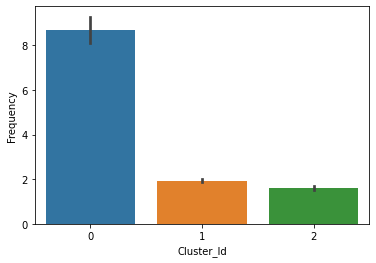

In [171]:
# Box plot to visualize Cluster Id vs Frequency

sns.barplot(x='Cluster_Id', y='Frequency', data=rfm_segmentation)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

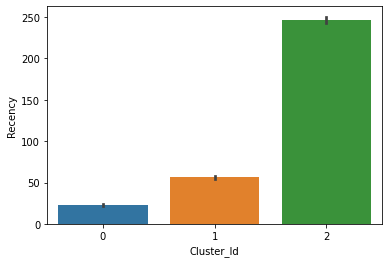

In [170]:
# Box plot to visualize Cluster Id vs Recency

sns.barplot(x='Cluster_Id', y='Recency', data=rfm_segmentation)

In [144]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

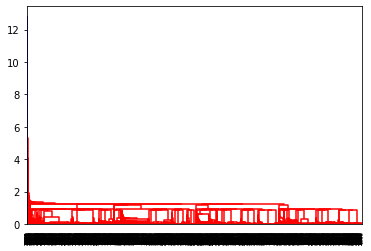

In [146]:
# Single linkage: 

mergings = linkage(RFM_norm1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

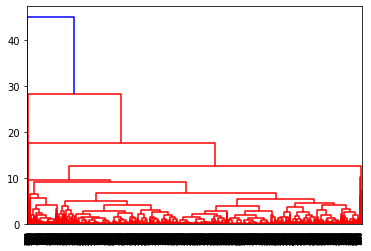

In [148]:
# Complete linkage

mergings = linkage(RFM_norm1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

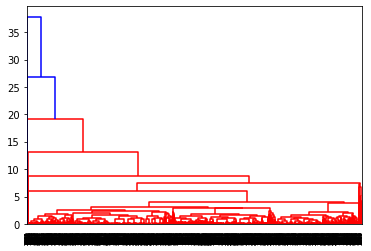

In [149]:
# Average linkage

mergings = linkage(RFM_norm1, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

Cutting the Dendrogram based on K

In [150]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [151]:
# Assign cluster labels

rfm_segmentation['Cluster_Labels'] = cluster_labels
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Cluster_Id,Cluster_Labels
CustomerID,,,,,,,,,
12346.0,325,1,0.00,1,1,1,111,0,0
12347.0,2,7,163.16,4,4,4,444,1,0
12348.0,75,4,331.36,2,3,4,234,1,0
12349.0,18,1,15.00,3,1,1,311,2,0
12350.0,310,1,25.20,1,1,2,112,0,0


<AxesSubplot:xlabel='Cluster_Labels', ylabel='Monetary'>

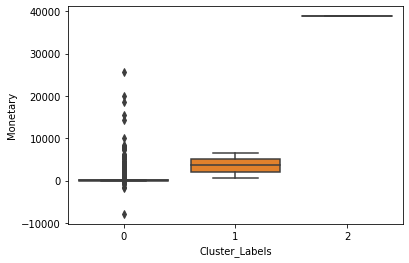

In [153]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Cluster_Labels', y='Monetary', data=rfm_segmentation)

<AxesSubplot:xlabel='Cluster_Labels', ylabel='Frequency'>

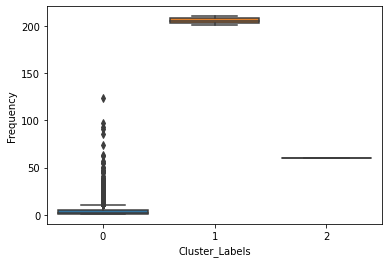

In [154]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfm_segmentation)

<AxesSubplot:xlabel='Cluster_Labels', ylabel='Recency'>

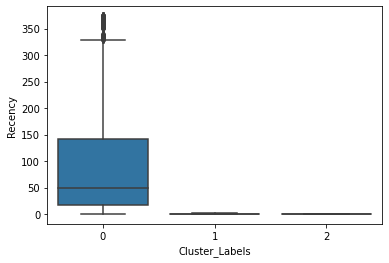

In [155]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm_segmentation)

In [159]:
#summarise
#RFM_hc.Recency = RFM_hc.Recency.dt.days
km_clusters_amount = 	pd.DataFrame(rfm_segmentation.groupby(["Cluster_Labels"]).Monetary.mean())
km_clusters_frequency = 	pd.DataFrame(rfm_segmentation.groupby(["Cluster_Labels"]).Frequency.mean())
km_clusters_recency = 	pd.DataFrame(rfm_segmentation.groupby(["Cluster_Labels"]).Recency.mean())

In [162]:
df = pd.concat([pd.Series([0,1,2]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ClusterID       3 non-null      int64  
 1   Amount_mean     3 non-null      float64
 2   Frequency_mean  3 non-null      float64
 3   Recency_mean    3 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 224.0 bytes


<AxesSubplot:xlabel='ClusterID', ylabel='Amount_mean'>

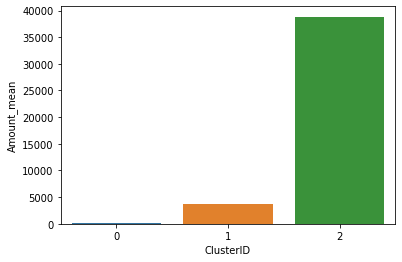

In [163]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean)

<AxesSubplot:xlabel='ClusterID', ylabel='Frequency_mean'>

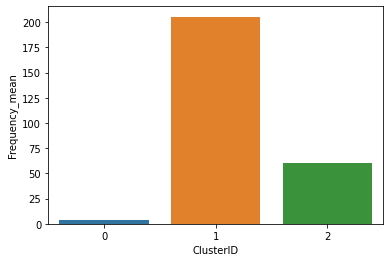

In [164]:
sns.barplot(x=df.ClusterID, y=df.Frequency_mean)

<AxesSubplot:xlabel='ClusterID', ylabel='Recency_mean'>

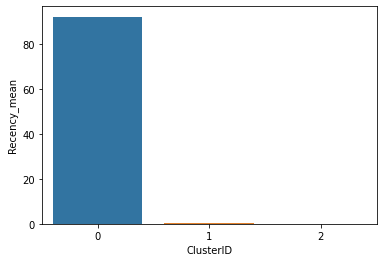

In [165]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)

#### Observation - 1

>K-Means Clustering with 3 Cluster Ids

Customers with Cluster Id 1 are the customers with high amount of transactions as compared to other customers.
Customers with Cluster Id 1 are frequent buyers.
Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.

#### Observation - 2

> Hierarchical Clustering with 3 Cluster Labels

Customers with Cluster_Labels 2 are the customers with high amount of transactions as compared to other customers.
Customers with Cluster_Labels 2 are frequent buyers.
Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.

---

## Project Task: Week 4

**Data Reporting:**

1. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

    a. Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures

    b. Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold

    c. Bar graph to show the count of orders vs. hours throughout the day

    d. Plot the distribution of RFM values using histogram and frequency charts

    e. Plot error (cost) vs. number of clusters selected

    f. Visualize to compare the RFM values of the clusters using heatmap
    

### Dashboard Outputs :

### Screenshot 1 - Task 1(a) - Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures

### Pritam's Example - In Session

In [1]:
from PIL import Image as PILImage
import base64, io, IPython
def image_import(image_path):
    image = PILImage.open(image_path)
    output = io.BytesIO()
    image.save(output, format='PNG')
    encoded_string = base64.b64encode(output.getvalue()).decode()
    html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
    return IPython.display.HTML(html)


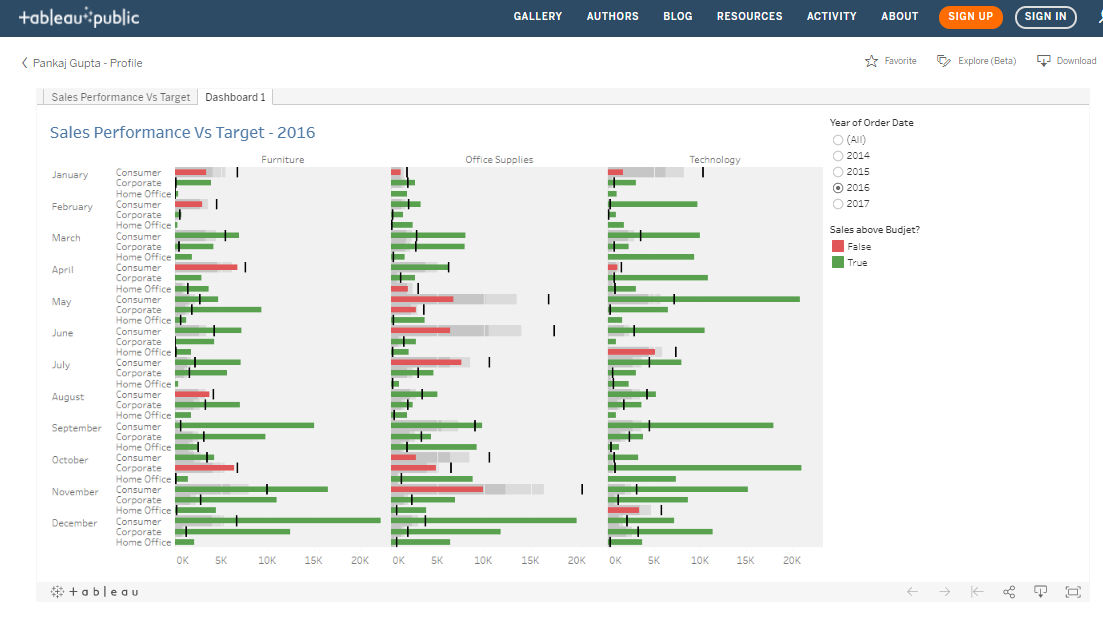

In [2]:
image_import("tableau.png")

### Screenshot 2 - Task 1(b) - Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold

### Screenshot 3 - Task 1(c) - Bar graph to show the count of orders vs. hours throughout the day

In [3]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.2 MB 4.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


Please click _**[here](https://public.tableau.com/profile/pankaj.gupta1357#!/vizhome/Project2-SalesPerformanceAnalysis_15909219880000/Dashboard1 "Tableau Dashboard")**_ for the **Live Tableau Dashboard**.

#### Observation - 1

> Blockquotes are very handy in email to emulate reply text.
> This line is part of the same quote.

#### Observation - 2

> This is a very long line that will still be quoted properly when it wraps. Oh boy let's keep writing to make sure this is long enough to actually wrap for everyone. Oh, you can *put* **Markdown** into a blockquote. 

---


<h2><center><b>&lt;End/&gt;</b></center></h2>